# USING LOGISTIC REGRESSION

In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import tarfile
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


In [3]:
# download and extract dataset
import urllib.request

url = 'https://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz'
file_name = 'rt-polaritydata.tar.gz'

# download
if not os.path.exists(file_name):
    urllib.request.urlretrieve(url, file_name)

# extract
with tarfile.open(file_name, 'r:gz') as tar:
        tar.extractall()

In [4]:
positive_path = "rt-polaritydata/rt-polarity.pos"
negative_path = "rt-polaritydata/rt-polarity.neg"

In [5]:
with open(positive_path, 'r', encoding ='latin-1') as file:
    positive_sentences = file.readlines()

with open(negative_path, 'r', encoding = 'latin-1' ) as file:
    negative_sentences = file.readlines()


positive_labels = np.ones(len(positive_sentences))
negative_labels = np.zeros(len(negative_sentences))

# combine
sentences = np.array( positive_sentences + negative_sentences )
labels = np.concatenate([positive_labels, negative_labels])


In [6]:
# training set : 4000 positive, 4000 negative 
# validation   : 500 positive , 500 negative
# test         : 831 positive , 831 negative

train_sentences = np.concatenate([positive_sentences[:4000], negative_sentences[:4000]])
train_labels    = np.concatenate([positive_labels[:4000], negative_labels[:4000]])

validation_sentences = np.concatenate([positive_sentences[4000:4500], negative_sentences[4000:4500]])
validation_labels    = np.concatenate([positive_labels[4000:4500], negative_labels[4000:4500]])

test_sentences = np.concatenate([positive_sentences[4500:], negative_sentences[4500:]])
test_labels = np.concatenate([positive_labels[4500:], negative_labels[4500:]])

In [20]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Step 1: Vectorizing text using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
train_vectors = vectorizer.fit_transform(train_sentences).toarray()
validation_vectors = vectorizer.transform(validation_sentences).toarray()
test_vectors = vectorizer.transform(test_sentences).toarray()

# Step 2: Implement Logistic Regression from scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.08, num_iterations=1500):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_params(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        loss = -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def fit(self, X, y):
        m, n_features = X.shape
        self.initialize_params(n_features)

        for i in range(self.num_iterations):
            # Forward propagation: Compute predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Backward propagation: Compute gradients
            dw = 1/m * np.dot(X.T, (y_pred - y))
            db = 1/m * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Optional: Calculate and print the loss every 100 iterations
            if i % 100 == 0 :
                loss = self.compute_loss(y, y_pred)
                print(f"Iteration {i}: Loss = {loss:.4f}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return np.where(y_pred >= 0.5, 1, 0)

# Step 3: Train Logistic Regression Model from scratch
lr_model = LogisticRegressionScratch(learning_rate=1.8, num_iterations=5000)
lr_model.fit(train_vectors, train_labels)

# Step 4: Validate the Model
val_predictions = lr_model.predict(validation_vectors)
val_accuracy = accuracy_score(validation_labels, val_predictions)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Iteration 0: Loss = 0.6931
Iteration 100: Loss = 0.6663
Iteration 200: Loss = 0.6441
Iteration 300: Loss = 0.6254
Iteration 400: Loss = 0.6092
Iteration 500: Loss = 0.5951
Iteration 600: Loss = 0.5825
Iteration 700: Loss = 0.5711
Iteration 800: Loss = 0.5608
Iteration 900: Loss = 0.5514
Iteration 1000: Loss = 0.5427
Iteration 1100: Loss = 0.5346
Iteration 1200: Loss = 0.5270
Iteration 1300: Loss = 0.5199
Iteration 1400: Loss = 0.5133
Iteration 1500: Loss = 0.5070
Iteration 1600: Loss = 0.5010
Iteration 1700: Loss = 0.4954
Iteration 1800: Loss = 0.4900
Iteration 1900: Loss = 0.4849
Iteration 2000: Loss = 0.4800
Iteration 2100: Loss = 0.4753
Iteration 2200: Loss = 0.4708
Iteration 2300: Loss = 0.4665
Iteration 2400: Loss = 0.4623
Iteration 2500: Loss = 0.4583
Iteration 2600: Loss = 0.4545
Iteration 2700: Loss = 0.4508
Iteration 2800: Loss = 0.4472
Iteration 2900: Loss = 0.4437
Iteration 3000: Loss = 0.4404
Iteration 3100: Loss = 0.4371
Iteration 3200: Loss = 0.4340
Iteration 3300: Loss =

In [18]:
# Step 4: Evaluate on Train Set
train_predictions = lr_model.predict(train_vectors)
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

# Step 5: Validate the Model on Validation Set
val_predictions = lr_model.predict(validation_vectors)
val_accuracy = accuracy_score(validation_labels, val_predictions)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Step 6: Test the Model on Test Set
test_predictions = lr_model.predict(test_vectors)
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Train Accuracy: 86.75%
Validation Accuracy: 76.70%
Test Accuracy: 75.45%


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# After making predictions on the validation or test set
val_predictions = lr_model.predict(validation_vectors)

# Generate a classification report
report = classification_report(validation_labels, val_predictions, target_names=['Negative', 'Positive'])
print("Classification Report:\n", report)

# Confusion matrix to get TP, FP, TN, FN
conf_matrix = confusion_matrix(validation_labels, val_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")


Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.78      0.77       500
    Positive       0.77      0.76      0.76       500

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000

Confusion Matrix:
 [[388 112]
 [122 378]]
TP: 378, TN: 388, FP: 112, FN: 122


# NAIVE BAYES CLASSIFER

Validation Accuracy: 76.90%


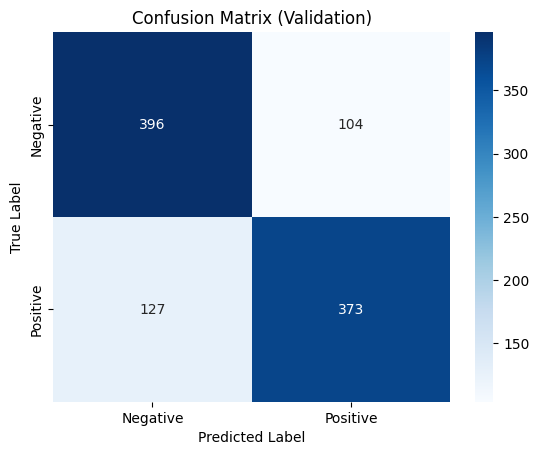

Test Accuracy: 77.80%


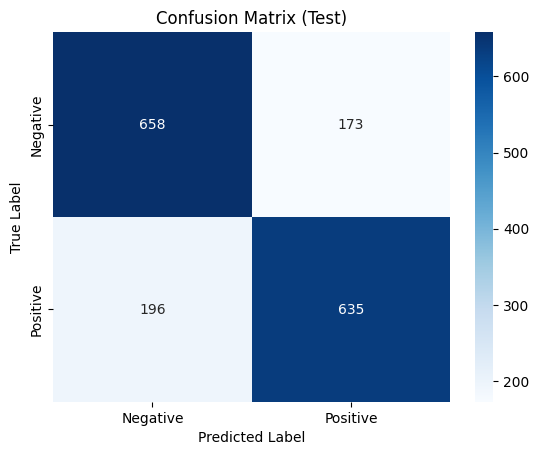

In [30]:
import numpy as np
import re
import os
import urllib.request
import tarfile
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# Download and Extract Dataset
url = 'https://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz'
file_name = 'rt-polaritydata.tar.gz'

if not os.path.exists(file_name):
    print("Downloading dataset...")
    urllib.request.urlretrieve(url, file_name)
    print("Download complete.")

if not os.path.exists('rt-polaritydata'):
    with tarfile.open(file_name, 'r:gz') as tar:
        tar.extractall()
        print("Extraction complete.")

positive_path = "rt-polaritydata/rt-polarity.pos"
negative_path = "rt-polaritydata/rt-polarity.neg"

# Step 2: Read Data
with open(positive_path, 'r', encoding='latin-1') as file:
    positive_sentences = [line.strip() for line in file.readlines()]

with open(negative_path, 'r', encoding='latin-1') as file:
    negative_sentences = [line.strip() for line in file.readlines()]

positive_labels = np.ones(len(positive_sentences))
negative_labels = np.zeros(len(negative_sentences))


sentences = positive_sentences + negative_sentences
labels = np.concatenate([positive_labels, negative_labels])

# Preprocess Data
def preprocess(text):
    # Remove non-word characters and convert to lowercase
    return re.sub(r'\W+', ' ', text.lower())

sentences = [preprocess(sentence) for sentence in sentences]

# Step 4: Split Data into Train, Validation, and Test Sets
train_sentences = positive_sentences[:4000] + negative_sentences[:4000]
train_labels = np.concatenate([positive_labels[:4000], negative_labels[:4000]])

validation_sentences = positive_sentences[4000:4500] + negative_sentences[4000:4500]
validation_labels = np.concatenate([positive_labels[4000:4500], negative_labels[4000:4500]])

test_sentences = positive_sentences[4500:] + negative_sentences[4500:]
test_labels = np.concatenate([positive_labels[4500:], negative_labels[4500:]])

# Naive Bayes Classifier with Regularization
class NaiveBayesClassifier:
    def __init__(self, smoothing=1.0):
        self.smoothing = smoothing
        self.vocab = set()
        self.word_counts = defaultdict(lambda: [0, 0])
        self.class_counts = [0, 0]
    
    def fit(self, texts, labels):
        for text, label in zip(texts, labels):
            self.class_counts[int(label)] += 1
            for word in text.split():
                self.vocab.add(word)
                self.word_counts[word][int(label)] += 1
    
    def predict(self, text):
        word_probs = np.log(np.array(self.class_counts) / sum(self.class_counts))
        total_words = len(self.vocab)
        
        for word in text.split():
            if word in self.vocab:
                # Regularization: Adjust smoothing parameter for Laplace smoothing
                word_probs[0] += np.log((self.word_counts[word][0] + self.smoothing) / 
                                        (self.class_counts[0] + self.smoothing * total_words))
                word_probs[1] += np.log((self.word_counts[word][1] + self.smoothing) / 
                                        (self.class_counts[1] + self.smoothing * total_words))
        return np.argmax(word_probs)
    
    def predict_all(self, texts):
        return np.array([self.predict(text) for text in texts])

# Model Training
nb_model = NaiveBayesClassifier(smoothing = 3)  # Adjusting smoothing for regularization
nb_model.fit(train_sentences, train_labels)

# Step 7: Evaluate Naive Bayes Classifier
def evaluate(model, sentences, labels, dataset_name="Test"):
    preds = model.predict_all(sentences)
    accuracy = np.mean(preds == labels)
    print(f"{dataset_name} Accuracy: {accuracy * 100:.2f}%")
    cm = confusion_matrix(labels, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix ({dataset_name})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Train, Validation, Test Evaluation
evaluate(nb_model, validation_sentences, validation_labels, "Validation")
evaluate(nb_model, test_sentences, test_labels, "Test")


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# After making predictions on the validation or test set
val_predictions = lr_model.predict(validation_vectors)

# Generate a classification report
report = classification_report(validation_labels, val_predictions, target_names=['Negative', 'Positive'])
print("Classification Report:\n", report)

# Confusion matrix to get TP, FP, TN, FN
conf_matrix = confusion_matrix(validation_labels, val_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Extract TP, FP, TN, FN from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}")


Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.78      0.77       500
    Positive       0.77      0.76      0.76       500

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000

Confusion Matrix:
 [[388 112]
 [122 378]]
TP: 378, TN: 388, FP: 112, FN: 122


# NAIVE BAYES CLASSIFIER USING STEMMING AND NGRAMS

In [31]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to C:\Users\Binod
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Validation Accuracy: 78.70%


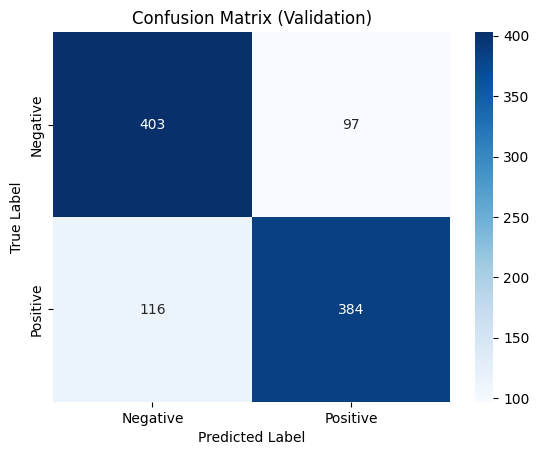

Test Accuracy: 77.80%


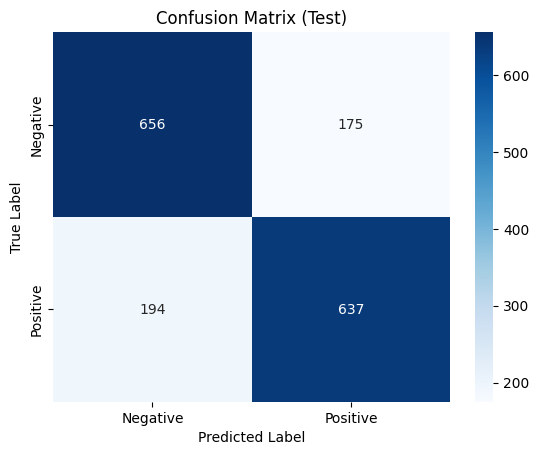

In [22]:
import numpy as np
import re
import os
import urllib.request
import tarfile
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from math import log

# Download stopwords
import nltk
nltk.download('stopwords')

# Step 1: Download and Extract Dataset
url = 'https://www.cs.cornell.edu/people/pabo/movie-review-data/rt-polaritydata.tar.gz'
file_name = 'rt-polaritydata.tar.gz'

if not os.path.exists(file_name):
    print("Downloading dataset...")
    urllib.request.urlretrieve(url, file_name)
    print("Download complete.")

if not os.path.exists('rt-polaritydata'):
    with tarfile.open(file_name, 'r:gz') as tar:
        tar.extractall()
        print("Extraction complete.")

positive_path = "rt-polaritydata/rt-polarity.pos"
negative_path = "rt-polaritydata/rt-polarity.neg"

# Step 2: Read Data
with open(positive_path, 'r', encoding='latin-1') as file:
    positive_sentences = [line.strip() for line in file.readlines()]

with open(negative_path, 'r', encoding='latin-1') as file:
    negative_sentences = [line.strip() for line in file.readlines()]

positive_labels = np.ones(len(positive_sentences))
negative_labels = np.zeros(len(negative_sentences))

# Combine sentences and labels
sentences = positive_sentences + negative_sentences
labels = np.concatenate([positive_labels, negative_labels])

# Step 3: Preprocess Data
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Remove non-word characters, convert to lowercase, remove stopwords, and apply stemming
    words = re.sub(r'\W+', ' ', text.lower()).split()
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(filtered_words)

sentences = [preprocess(sentence) for sentence in sentences]

# Step 4: Split Data into Train, Validation, and Test Sets
train_sentences = positive_sentences[:4000] + negative_sentences[:4000]
train_labels = np.concatenate([positive_labels[:4000], negative_labels[:4000]])

validation_sentences = positive_sentences[4000:4500] + negative_sentences[4000:4500]
validation_labels = np.concatenate([positive_labels[4000:4500], negative_labels[4000:4500]])

test_sentences = positive_sentences[4500:] + negative_sentences[4500:]
test_labels = np.concatenate([positive_labels[4500:], negative_labels[4500:]])

# Step 5: Implement Naive Bayes Classifier with TF-IDF and n-grams (up to bigrams)
class NaiveBayesClassifier:
    def __init__(self, smoothing=1.0):
        self.smoothing = smoothing
        self.vocab = defaultdict(lambda: [0, 0])  # word -> [class_0_count, class_1_count]
        self.class_counts = [0, 0]  # [count of negative, count of positive]
        self.total_vocab = 0
    
    def extract_ngrams(self, text, n=2):
        words = text.split()
        return [' '.join(words[i:i+n]) for i in range(len(words) - n + 1)]
    
    def fit(self, texts, labels):
        for text, label in zip(texts, labels):
            self.class_counts[int(label)] += 1
            words = text.split() + self.extract_ngrams(text, n=2)  # include unigrams and bigrams
            for word in words:
                self.vocab[word][int(label)] += 1
        self.total_vocab = len(self.vocab)
    
    def predict(self, text):
        words = text.split() + self.extract_ngrams(text, n=2)
        word_probs = [log(self.class_counts[0] / sum(self.class_counts)), 
                      log(self.class_counts[1] / sum(self.class_counts))]

        for word in words:
            if word in self.vocab:
                # Regularization: Apply Laplace smoothing
                word_probs[0] += log((self.vocab[word][0] + self.smoothing) / 
                                     (self.class_counts[0] + self.smoothing * self.total_vocab))
                word_probs[1] += log((self.vocab[word][1] + self.smoothing) / 
                                     (self.class_counts[1] + self.smoothing * self.total_vocab))
        return np.argmax(word_probs)
    
    def predict_all(self, texts):
        return np.array([self.predict(text) for text in texts])

# Step 6: Train the Model
nb_model = NaiveBayesClassifier(smoothing=2.5)  # Adjusting smoothing for regularization
nb_model.fit(train_sentences, train_labels)

# Step 7: Evaluate Naive Bayes Classifier
def evaluate(model, sentences, labels, dataset_name="Test"):
    preds = model.predict_all(sentences)
    accuracy = np.mean(preds == labels)
    print(f"{dataset_name} Accuracy: {accuracy * 100:.2f}%")
    cm = confusion_matrix(labels, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix ({dataset_name})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Train, Validation, Test Evaluation
# evaluate(nb_model, train_sentences, train_labels, "Train")
evaluate(nb_model, validation_sentences, validation_labels, "Validation")
evaluate(nb_model, test_sentences, test_labels, "Test")


In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predict on the test set
test_preds = nb_model.predict_all(test_sentences)

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(test_labels, test_preds).ravel()

# Precision, Recall, F1
precision = precision_score(test_labels, test_preds)
recall = recall_score(test_labels, test_preds)
f1 = f1_score(test_labels, test_preds)

# Print metrics
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


True Positives (TP): 638
True Negatives (TN): 656
False Positives (FP): 175
False Negatives (FN): 193
Precision: 0.7847
Recall: 0.7677
F1-score: 0.7762
